# NLP Language Detection

## Imports

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the dataset

In [3]:
data = pd.read_csv("/Users/andrescarvajal/Desktop/Data Science/NLP/two_languages.csv")

In [4]:
data

,Unnamed: 0,Text,language
0,21,en navidad de poco después de que interpretó ...,Spanish
1,37,in johnson was awarded an american institute ...,English
2,40,bussy-saint-georges has built its identity on ...,English
3,76,minnesotas state parks are spread across the s...,English
4,90,nordahl road is a station served by north coun...,English
...,...,...,...
1995,21951,the total high school population was now appro...,English
1996,21959,para colmo las tropas albanesas atacaban conti...,Spanish
1997,21975,fue fundado el de octubre de el día de ese ...,Spanish
1998,21983,el investigador ha recibido varios reconocimie...,Spanish


## Value count for each language

In [5]:
data["language"].value_counts()

Spanish    1000
English    1000
Name: language, dtype: int64

## Separating the independent and dependant features

In [6]:
X = data["Text"]
y = data["language"]

In [7]:
print(X)

0       en navidad de  poco después de que interpretó ...
1       in  johnson was awarded an american institute ...
2       bussy-saint-georges has built its identity on ...
3       minnesotas state parks are spread across the s...
4       nordahl road is a station served by north coun...
                              ...                        
1995    the total high school population was now appro...
1996    para colmo las tropas albanesas atacaban conti...
1997    fue fundado el  de octubre de  el día  de ese ...
1998    el investigador ha recibido varios reconocimie...
1999    con motivo de la celebración del septuagésimoq...
Name: Text, Length: 2000, dtype: object


## Converting categorical variables to numerical

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

## Iterating through all the text

In [9]:
# creating a list for appending the preprocessed text
data_list = []
word_set = []
# iterating through all the text
for text in X:
    # removing the symbols and numbers
    text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    # converting the text to lower case
    text = text.lower()
    # appending to data_list
    data_list.append(text)
    for word in text:
        if word not in word_set:
            word_set.append(word)

print(data_list)
print(word_set)

['e   avidad de  poco después de que i terpretó la ca ció  e  fra cés película papillo  toi qui regarde la mer ella ca tará la esplé dida versió  de gloria aleluya para u a misa de media oche celebrada por rtl', 'i   joh so  was awarded a  america  i stitute of architects gold medal i   he became the first recipie t of the pritzker architecture prize the most prestigious i ter atio al architectural award', 'bussy-sai t-georges has built its ide tity o  a gree  model e viro me t with parks a d garde s they represe t  hectares of i tegrated gree  spaces  kilometres  miles of soft co  ecti g li ks  squares a d parks i  the city ce tre  pools a d more tha   trees today', 'mi  esotas state parks are spread across the state i  such a way that there is a state park withi   miles  km of every mi  esota  the most rece t park created is lake vermilio  state park created i   curre tly the parks ra ge i  size from fra z jev e state park with  acres  ha to sai t croix state park with  acres  ha two

## Creating bag of words using countvectorizer

In [10]:
#from sklearn.feature_extraction.text import CountVectorizer
#cv = CountVectorizer()
#X = cv.fit_transform(data_list).toarray()
#df = pd.DataFrame(X)

#for i in range(len(df)):
    #print(df[i].unique())

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [12]:
X = vectorizer.fit_transform(data_list)

In [13]:
print(vectorizer.get_feature_names())

['aa', 'aacp', 'aam', 'aamer', 'aardvark', 'aba', 'abad', 'abades', 'abadía', 'abarca', 'abarcará', 'abarth', 'abas', 'abastecimie', 'abasteció', 'abba', 'abbey', 'abbot', 'abd', 'abducted', 'abducti', 'abductio', 'abdujo', 'abdul', 'abdullah', 'abe', 'abejas', 'abejorral', 'aberllefe', 'aberra', 'abertura', 'abha', 'abid', 'abierta', 'abiertame', 'abierto', 'abilities', 'ability', 'abismo', 'abita', 'abiza', 'able', 'abled', 'ableme', 'abli', 'ablow', 'abloy', 'ably', 'aboard', 'aboga', 'abogacía', 'abogado', 'abolitio', 'abordados', 'aboríge', 'abott', 'about', 'above', 'abraham', 'abram', 'abrams', 'abrazo', 'abre', 'abreviada', 'abreviado', 'abreviatura', 'abrie', 'abrigo', 'abril', 'abrir', 'abrirse', 'abrió', 'abroad', 'abruptly', 'abse', 'absoluta', 'absolutas', 'absolutely', 'absolutismo', 'absoluto', 'absorbed', 'absorbido', 'abstract', 'abstractio', 'abstracto', 'abstuvo', 'abu', 'abucheada', 'abuelo', 'abuelos', 'aburrido', 'abusar', 'abuse', 'abusivo', 'abuso', 'abusos', 'a

## Train-test splitting

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

## Model creation and prediction

In [15]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

model.fit(x_train, y_train)

MultinomialNB()

## Prediction 

In [16]:
y_pred = model.predict(x_test)

In [17]:
## model evaluation

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [19]:
print("Accuracy is :",ac)

Accuracy is : 0.9925


## Visualising the confusion matrix

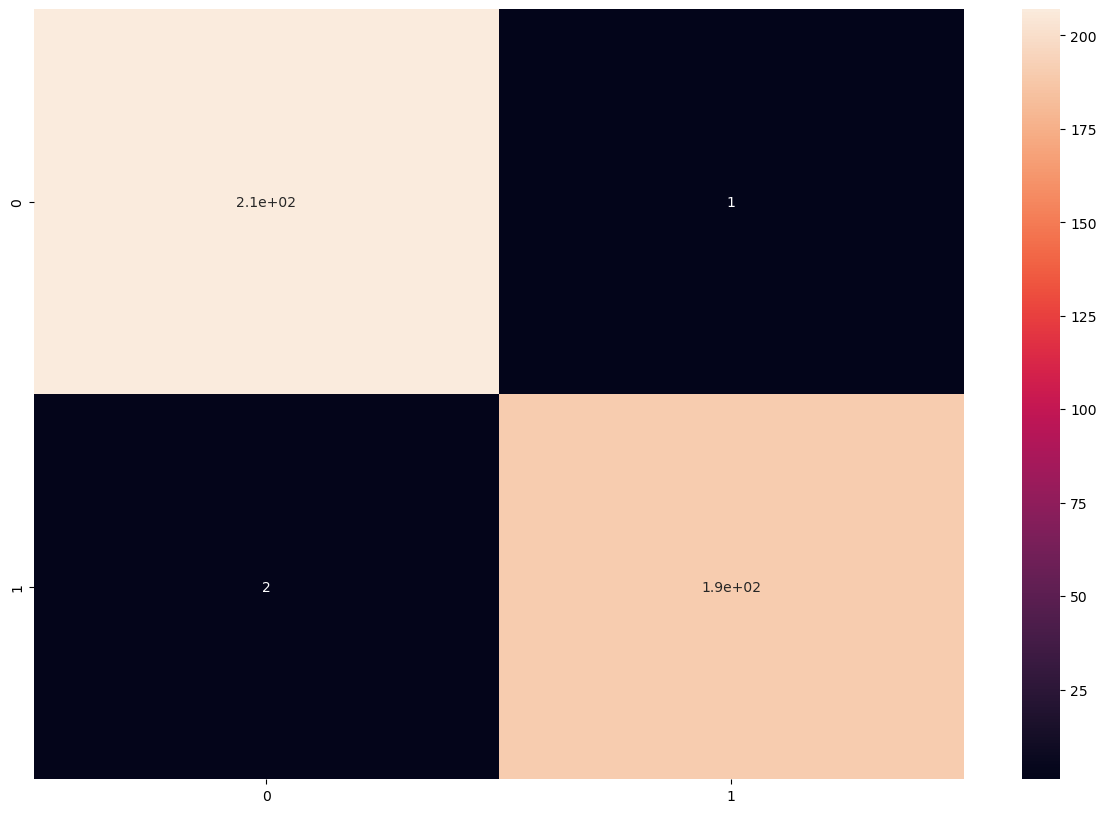

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

## Function for the prediction

In [21]:
def predict(text):
    new_x = vectorizer.transform([text]).toarray()
    print(new_x)
    lang = model.predict(new_x)
    print(model.predict_proba(new_x))
    lang = le.inverse_transform(lang)
    print("The langauge is in",lang[0])

In [23]:
predict("The Prophet uses a decomposable time series model with three main model components: trend, seasonality, and holidays. They are combined in the following equation")

[[0. 0. 0. ... 0. 0. 0.]]
[[0.98561027 0.01438973]]
The langauge is in English


In [24]:
predict("Queda pendiente arreglar un botton de start para actualizar la pagina y re empezar el juego")

[[0. 0. 0. ... 0. 0. 0.]]
[[0.09452642 0.90547358]]
The langauge is in Spanish


In [25]:
import pickle

In [26]:
# saving both cv and model
pickle.dump(vectorizer, open("transform.pkl", "wb"))
pickle.dump(model, open("model.pkl", "wb"))